# Linear Regression

In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model




In [2]:
hockey = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [3]:
x = np.array(hockey[['G', 'A']])
y = np.array(hockey.PTS)

In [4]:
multi = linear_model.LinearRegression()
multi.fit(x, y)

multiIntercept = multi.intercept_
multiCoef = multi.coef_

print("Intercept: ", multiIntercept)
print("Coef: ")
list(zip(['G', 'A'], multiCoef))

Intercept:  7.105427357601002e-15
Coef: 


[('G', 0.9999999999999991), ('A', 1.0)]

In [5]:
simple = linear_model.LinearRegression()
simple.fit(hockey[['G']], hockey['PTS'])

simpleIntercept = simple.intercept_
simpleCoef = simple.coef_

print("Intercept: ", simpleIntercept)
print("Coef: ", simpleCoef)

Intercept:  3.7372431596039206
Coef:  [2.17678045]


The intercept of the Simple Linear Regression (SLR) is much higher than the intercept of the Multiple Linear Regression (MLR), which mean that at x=0, or x1=0 and x2=0, the predict value of SLR will be higher than MLR, though we must take into consideration of the fact that MLR is influence by 2 variable rather than 1. The slope is also steeper for SLR than the slope of MLR.
Now, let's make a prediction to see how good of a fit both models are. Let's take an example of A=42 and G=6

In [6]:
from sklearn import metrics

testSimple = np.array([[6]])
testMulti = np.array([[6, 42]], dtype='int32')

simplePredict = simple.predict(testSimple)
print(simplePredict)
multiPredict = multi.predict(testMulti)
print(multiPredict)

print('R squared for Multi: {:.2f}'.format(multi.score(x,y)*100))
print('R squared for Simple: {:.2f}'.format(simple.score(hockey[['G']], hockey['PTS'])*100))



[16.79792589]
[48.]
R squared for Multi: 100.00
R squared for Simple: 84.62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Seem likes R square for MLR is like perfect. It means 100% of the data fit under regression model, while it is 84.52% for SLR.
I think I have gotten it wrong somewhere.

#Logistic Regression

In [8]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [9]:
y = np.array(df.Death1.eq('YES').mul(1))
X = np.array(df.Appearances).reshape(-1, 1)


logr = linear_model.LogisticRegression()
logr.fit(X,y)

predicted = logr.predict(np.array([1500]).reshape(-1,1))
print(predicted)

[1]


Seems like if you appear on Marvel 1500 times, you'll be dead.

#Pick your own: Logistic Regression

In [14]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')


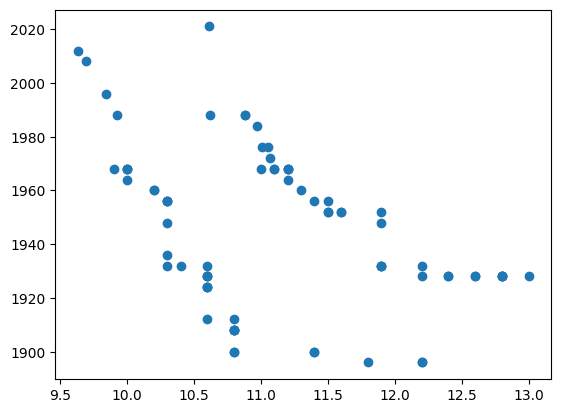

In [15]:
plt.scatter(df['Time'],df['Games'])


I'll use Simple Linear Regression because it is a continuous int outcome y not categorial.

In [28]:
X = np.array(df.Games).reshape(-1, 1)
y = np.array(df.Time).reshape(-1, 1)

#regrr = linear_model.LinearRegression()
#regrr.fit(X, y)

#predict2024 = regrr.predict(np.array([[2024]]).reshape(-1, 1))
#predict2030 = regrr.predict(np.array([[2030]]).reshape(-1, 1))

#print("Prediction for 2024: ", predict2024)
#print("Prediction for 2030: ", predict2030)
print(np.shape(X))
print(np.shape(y))

(76, 1)
(76, 1)


I think it looks pretty good. It seems to line up with other records.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [29]:
def quadratic_func(x, a, b, c):
    return a + b * x + c * x**2

In [33]:
np.random.seed(0)
a = np.linspace(-5, 5, num=50)
b = 2.0 + 1.5 * x + 3.0 * x**2 + np.random.normal(scale=3.0, size=x.shape)
print(np.shape(b))

(1076, 2)


In [34]:
popt, pcov = curve_fit(quadratic_func, df['Games'], df['Time'])

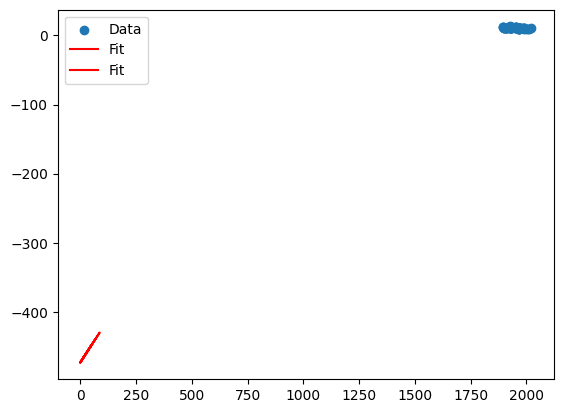

In [37]:
plt.scatter(X, y, label='Data')
plt.plot(x, quadratic_func(x, *popt), 'r-', label='Fit')
plt.legend()
plt.show()